## 猫狗分类案例优化 - 数据增强


### 数据增强的基本概念

**数据增强：**利用多种数字图像处理方法（旋转,剪切,错切,缩放,翻转,边缘填充）生成可信图像.
其目标是，模型在训练时不会两次查看完全相同的图像。这让模型能够观察到数据的更多内容，从而具有更好的泛化能力。

在keras中可以通过:ImageDataGenerator函数来实现图像的随机变换.
 - rotation_range 是角度值（在 0~180 范围内），表示图像随机旋转的角度范围。
 - width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围（相对于总宽度或总高度的比例）。
 - shear_range 是随机错切变换的角度。
 - zoom_range 是图像随机缩放的范围。
 - horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设（比如真实世界的图像），这种做法是有意义的。
 - fill_mode是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移。


In [1]:
import os,shutil

original_data_dir = "G:/Data/Kaggle/dogcat/train"
base_dir = "G:/Data/Kaggle/dogcat/smallData"
if os.path.isdir(base_dir) == False:
    os.mkdir(base_dir)

# 创建三个文件夹用来存放不同的数据:train,validation,test
train_dir = os.path.join(base_dir,'train')
if os.path.isdir(train_dir) == False:
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
if os.path.isdir(validation_dir) == False:
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
if os.path.isdir(test_dir) == False:
    os.mkdir(test_dir)
    
# 在文件中:train,validation,test分别创建cats,dogs文件夹用来存放对应的数据
train_cats_dir = os.path.join(train_dir,'cats')
if os.path.isdir(train_cats_dir) == False:
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
if os.path.isdir(train_dogs_dir) == False:
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
if os.path.isdir(validation_cats_dir) == False:
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
if os.path.isdir(validation_dogs_dir) == False:
    os.mkdir(validation_dogs_dir)
    
test_cats_dir = os.path.join(test_dir,'cats')
if os.path.isdir(test_cats_dir) == False:
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
if os.path.isdir(test_dogs_dir) == False:
    os.mkdir(test_dogs_dir)


#将原始数据拷贝到对应的文件夹中 cat
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_data_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_data_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
    
#将原始数据拷贝到对应的文件夹中 dog
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_data_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_data_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [4]:
#利用 ImageDataGenerator 来设置数据增强
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

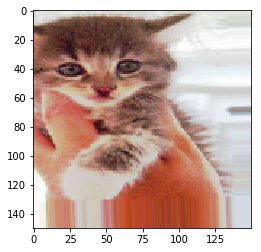

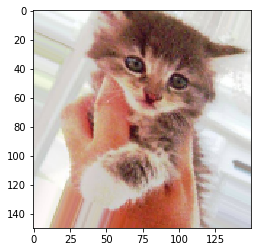

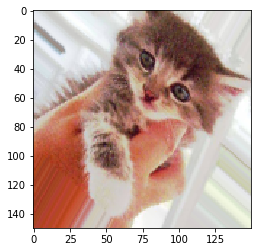

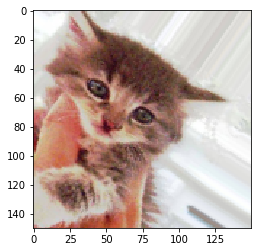

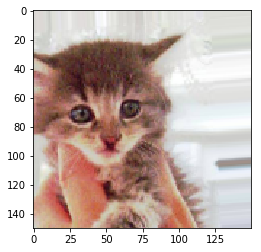

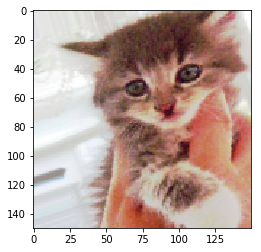

In [7]:
#显示随机增强后的训练图像

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os,shutil
import matplotlib.pyplot as plt

#选择一张图像进行增强
fnames = [os.path.join(train_cats_dir,fname) for 
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

#读取图像并调整大小
img = image.load_img(img_path,target_size=(150,150))

# 将其转换为形状 (150, 150, 3) 的 Numpy 数组
x = image.img_to_array(img)

# 将其形状改变为 (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

#生成随机变换后的图像批量
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 6 == 0:
        break
plt.show()


### 搭建网络模型

模型的搭建流程基本上都是 Conv2D+MaxPooling2D 的组合，要根据数据的大小可能需要更深的网络，以及最后的激活函数的选择。本实例中，初始的输入尺寸为150x150，最后计算在Flatten层之前的特征图大小为7x7.
模型的搭建与上篇是类似的,不同之处在于:添加了一个Dropout层,来防止过拟合.

In [2]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 数据增强处理

利用ImageDataGenerator函数来增强图片,这里注意只能增强训练的数据,测试的数据不能用来增强处理.

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# 利用批量生成器拟合模型
history = model.fit_generator( 
      train_generator, 
      steps_per_epoch=100, 
      epochs=100, 
      validation_data=validation_generator, 
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6922 - acc: 0.5109 - val_loss: 0.6848 - val_acc: 0.5527
Epoch 2/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6801 - acc: 0.5612 - val_loss: 0.6598 - val_acc: 0.5857
Epoch 3/100
100/100 [==============================] - 25s 250ms/step - loss: 0.6733 - acc: 0.5709 - val_loss: 0.6863 - val_acc: 0.5203
Epoch 4/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6511 - acc: 0.6259 - val_loss: 0.6979 - val_acc: 0.5670
Epoch 5/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6326 - acc: 0.6434 - val_loss: 0.6199 - val_acc: 0.6434
Epoch 6/100
100/100 [==============================] - 25s 250ms/step - loss: 0.6252 - acc: 0.6478 - val_loss: 0.6267 - val_acc: 0.6095
Epoch 7/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6047 - acc: 0.6697 - val_loss: 0.5966 - val_acc: 0.6631


Epoch 59/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4038 - acc: 0.8113 - val_loss: 0.4051 - val_acc: 0.8144
Epoch 60/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4102 - acc: 0.8128 - val_loss: 0.4077 - val_acc: 0.8128
Epoch 61/100
100/100 [==============================] - 26s 256ms/step - loss: 0.4087 - acc: 0.8075 - val_loss: 0.4917 - val_acc: 0.7719
Epoch 62/100
100/100 [==============================] - 26s 263ms/step - loss: 0.4070 - acc: 0.8100 - val_loss: 0.4564 - val_acc: 0.7938
Epoch 63/100
100/100 [==============================] - 26s 258ms/step - loss: 0.4145 - acc: 0.8100 - val_loss: 0.5095 - val_acc: 0.7474
Epoch 64/100
100/100 [==============================] - 25s 252ms/step - loss: 0.4077 - acc: 0.8144 - val_loss: 0.4209 - val_acc: 0.7964
Epoch 65/100
100/100 [==============================] - 25s 247ms/step - loss: 0.3968 - acc: 0.8159 - val_loss: 0.4177 - val_acc: 0.8211
Epoch 66/100
100/100 [===================

In [7]:
model.save('cats_and_dogs_small_data_2.h5')

### 结果比较
从这些图像中都能看出过拟合的特征。使用了数据增强和 dropout 之后，模型不再过拟合：
训练曲线紧紧跟随着验证曲线。现在的精度为 82%，比未正则化的模型提高了 15%（相对比例）

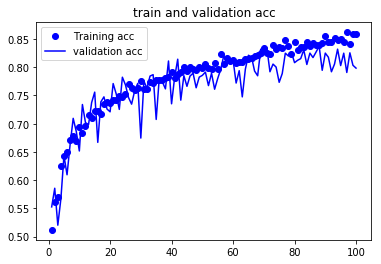

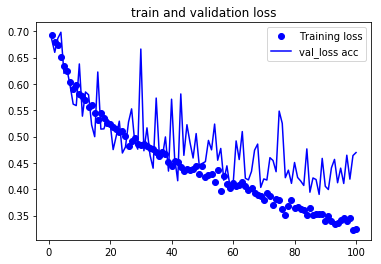

In [9]:
# 　绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) +1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('train and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='val_loss acc')
plt.title('train and validation loss')
plt.legend()

plt.show()